In [1]:
import pandas 
import pylab
from pandas import *
from pylab import *
import os

In [4]:
def readFileFlink(filename):
    return read_csv(filename,names = ["nan4","nan","passengerCnt", "num ele",
                                               "Latency","Time","nan2","nan3"])  
    
def readFileSpark(filename):
    return read_csv(filename,names = ["nan4","nan","passengerCnt", "num ele",
                                      "Latency","Time","nan2","nan3"])  

def getMeanLatency(file):
    lat=file.ix[1:len(file)-2,[4]]
    m=lat.mean()[0]
    return round(m,1)
def getSumElements(file):
    nums=file.ix[1:len(file)-2,[3]]
    return nums.sum()[0]
def getBatch(name):
    out=""
    for l in name:
        if(l=="-"):
            b=False
            return int(out)
        if(l=="c"):
            return 1000
        out+=str(l)
    return int(out)

def getTupleSpark(file,path):
    parts=path.split("\\")
    return (parts[1],int(parts[2]),int(parts[3]),int(parts[4]),int(getMeanLatency(file)),getSumElements(file),getBatch(parts[5]))
def getTupleFlink(file,path):
    parts=path.split("\\")
    return (parts[1],int(parts[2]),int(parts[3]),int(parts[4]),int(getMeanLatency(file)),getSumElements(file),0)

In [17]:
#find all results
import glob, os
#os.chdir("/results")
def getResults():
    
    flink=True
    data=list()
    #df = DataFrame(data,columns=index)   
    index=["system","windowSize","slidingSize","workload","avg. latency","num elements","batchtime"]



    for sysDir in glob.glob("results\*"):
        if (sysDir=="results\spark"):
            flink=False

        for windowTime in glob.glob(sysDir+"\*"):
            for slidingTime in glob.glob(windowTime+"\*"):
                for workload in glob.glob(slidingTime+"\*"):
                    for files in glob.glob(workload+"\*"):
                        found=False
                        if(flink):
                            if (os.path.getsize(files)>0):
                                file=readFileFlink(files)
                                t=getTupleFlink(file,files)
                                found=True
                                #print(file,"/n",files)
                        else:
                             if (os.path.getsize(files)>0):
                                file=readFileSpark(files)
                                t=getTupleSpark(file,files)
                                found=True
                        if(found):      
                            data.append(t)
    df = DataFrame(data,columns=index)                        
    df.append(Series(t[0:7],index=index),ignore_index=True) 
    return df
df=getResults()
#df
resS=df.loc[df["system"]=="flink"].loc[df["windowSize"]==3000].loc[df["slidingSize"]==2000]
resS

,system,windowSize,slidingSize,workload,avg. latency,num elements,batchtime
13,flink,3000,2000,10000,768,216825,0
14,flink,3000,2000,10000,81,1434155,0
15,flink,3000,2000,100000,71,15260784,0
16,flink,3000,2000,15000,214,1495882,0
17,flink,3000,2000,150000,10,22699498,0
18,flink,3000,2000,150000,23,22640687,0
19,flink,3000,2000,17000,387,567023,0
20,flink,3000,2000,20000,136,18293995,0
21,flink,3000,2000,20000,14,833557,0
22,flink,3000,2000,200000,29,6350649,0


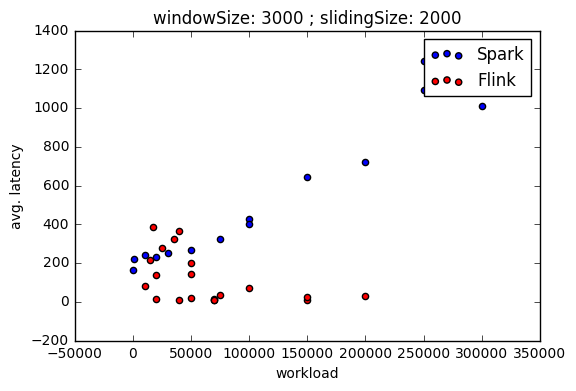

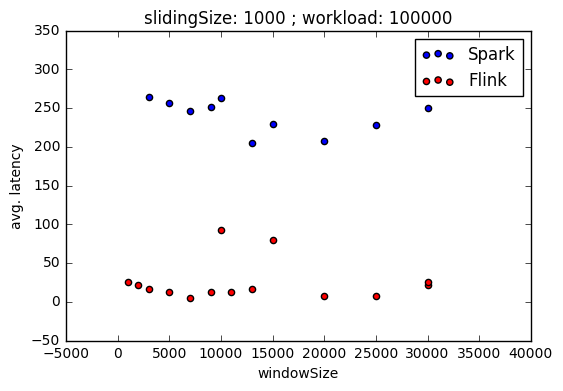

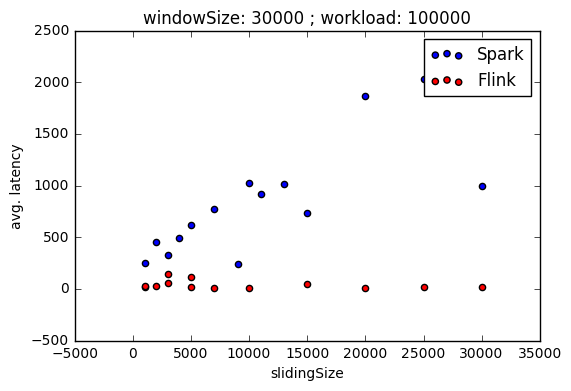

In [28]:
#analysis
import matplotlib.pyplot as plt
%matplotlib inline
def plotLatency(varName2,var2,varName3,var3,xName,yName):
    
    resS=df.loc[df["system"]=="spark"].loc[df[varName2]==var2].loc[df[varName3]==var3]
    resF=df.loc[df["system"]=="flink"].loc[df[varName2]==var2].loc[df[varName3]==var3]
    titleString=varName2+": "+str(var2)+" ; "+varName3+": "+str(var3)
    ax=resS.plot.scatter(x=xName,y=yName,label="Spark",color="Blue")
    resF.plot.scatter(x=xName,y=yName,label="Flink",ax=ax,color="Red",title=titleString)
    #resS.plot(x=xName,y=yName,title=titleString,kind="scatter" )
    #resF.plot(x=xName,y=yName,title=titleString )
    #reg = ols(y=resS[yName], x=resS[xName])
    #print(reg.summary)
    path='graphs/%s%s%s%s.png' %(varName2,var2,varName3,var3)
    savefig(path)
sys="system"
win="windowSize"
sli="slidingSize"
wor="workload"
lat="avg. latency"
ele="num elements"
df=getResults()
plotLatency(win,3000,sli,2000,wor,lat)

plotLatency(sli,1000,wor,100000,win,lat)

plotLatency(win,30000,wor,100000,sli,lat)
#res.ix[:,[4]].plot(kind="line",x=["da","hhh"],y="latency in seconds")
#res
#savefig('graphs/figure1.pdf')